In [1]:
#!pip install mlflow==2

In [2]:
# set env variables
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'kjkhan12'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '426c87e29e34d09836ee8eedb75aa07f57d7f8b9'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/kjkhan12/jalal4.mlflow'
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# set mlflow tracking uri
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/kjkhan12/jalal4.mlflow")

In [3]:
import pycaret
import mlflow
#mlflow.set_tracking_uri("http://localhost:5000")

In [4]:
import pycaret
pycaret.__version__

'3.2.0'

In [5]:
import pandas as pd
data = pd.read_csv('./data/final_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# to run local server with mlflow
!mlflow ui

In [6]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'Churn', session_id = 123, 
          ignore_features = ['customerID'], 
          log_experiment = True, 
          experiment_name = 'churn1')

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


2023/12/12 05:30:51 INFO mlflow.tracking.fluent: Experiment with name 'churn1' does not exist. Creating a new experiment.


In [ ]:
#Now you can see the experiment tracked via Dasghub Mlflow Integration
# https://dagshub.com/kjkhan12/jalal4.mlflow

In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8022,0.8472,0.8022,0.7929,0.7944,0.4575,0.4632,0.8120
lr,Logistic Regression,0.8020,0.8442,0.8020,0.7944,0.7962,0.4650,0.4688,0.8460
gbc,Gradient Boosting Classifier,0.8006,0.8482,0.8006,0.7916,0.7932,0.4550,0.4602,1.1710
ridge,Ridge Classifier,0.7994,0.0000,0.7994,0.7899,0.7915,0.4494,0.4552,0.3170
lda,Linear Discriminant Analysis,0.7968,0.8374,0.7968,0.7902,0.7922,0.4572,0.4595,0.3940
lightgbm,Light Gradient Boosting Machine,0.7903,0.8352,0.7903,0.7823,0.7846,0.4356,0.4385,0.6060
rf,Random Forest Classifier,0.7876,0.8218,0.7876,0.7767,0.7789,0.4160,0.4215,0.9120
et,Extra Trees Classifier,0.7682,0.7922,0.7682,0.7563,0.7595,0.3661,0.3704,0.8640
knn,K Neighbors Classifier,0.7655,0.7497,0.7655,0.7521,0.7559,0.3551,0.3595,0.4410
dummy,Dummy Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.2920


In [13]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)


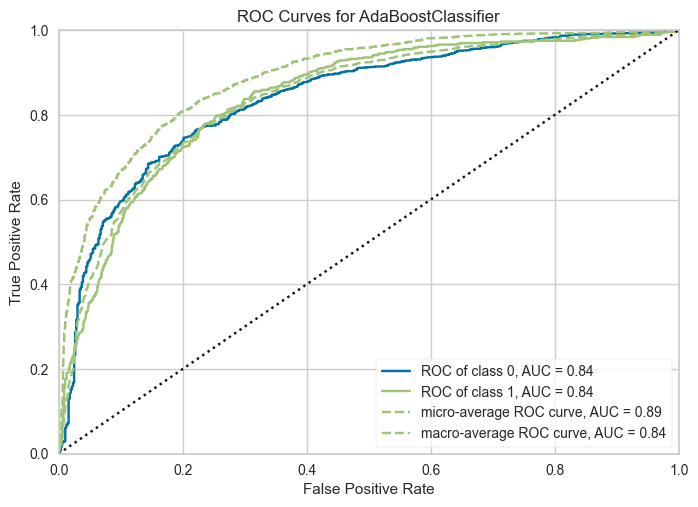

In [14]:
plot_model(best_model, plot = 'auc')

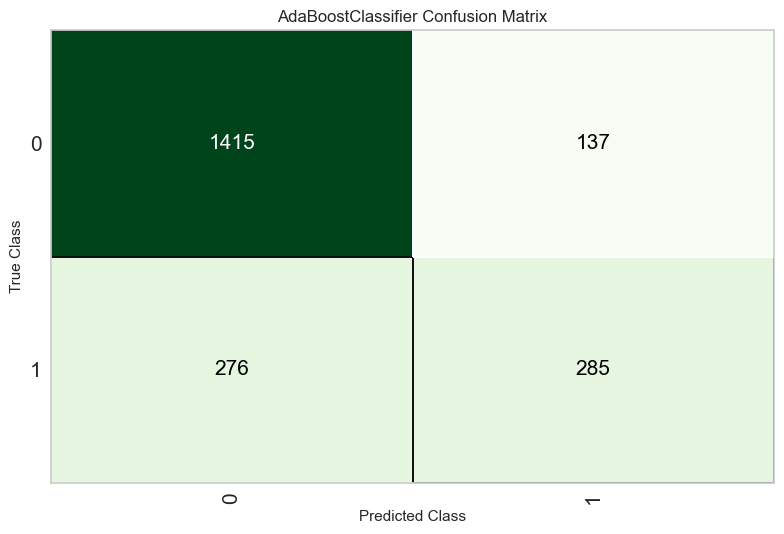

In [15]:
plot_model(best_model, plot = 'confusion_matrix')

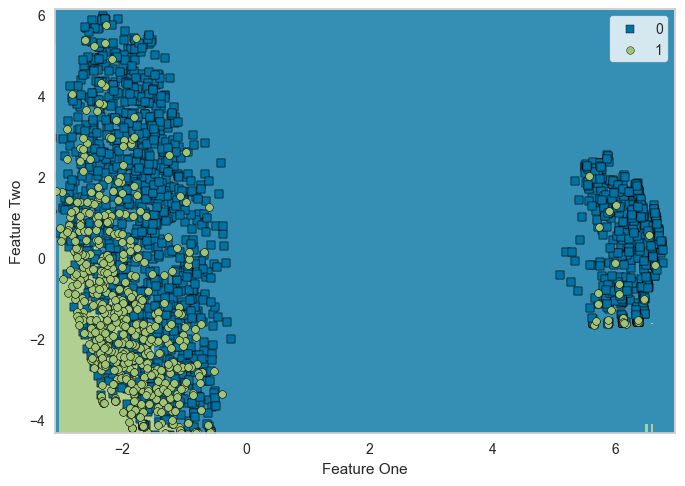

In [11]:
plot_model(best_model, plot = 'boundary')

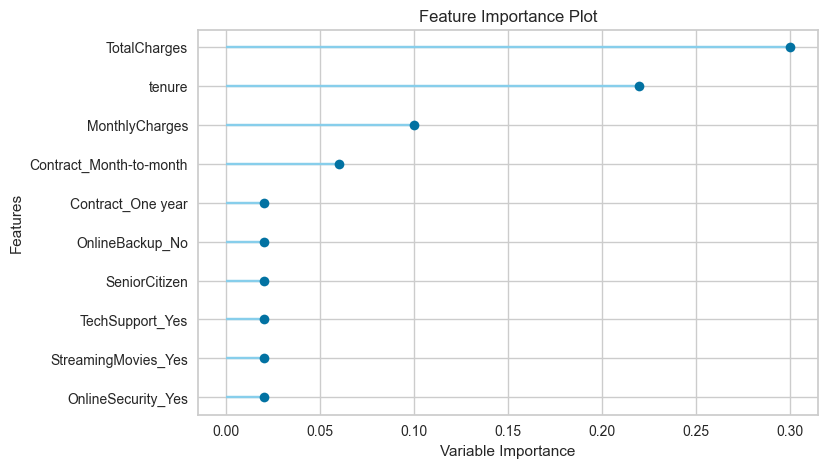

In [12]:
plot_model(best_model, plot = 'feature')

In [28]:
# save pipeline
save_model(best_model, 'outputs\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\leire\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                                                     'TechSupport',
                                                                     'StreamingTV',
                                                                     'StreamingMovies',
                                                                     'Contract',
                                                                  